In [ ]:
%matplotlib inline

In [ ]:
from treatment_sims_2023_02_21 import *

Splikes version  0.1.4
Plasticnet version  0.1.12
macOS-14.5-arm64-arm-64bit
Base Image File: asdf/bbsk081604_all_scale2.asdf


In [ ]:
base='sims/2024-06-03'

In [ ]:
from collections import namedtuple
params = namedtuple('params', 
                    ['count', 'noise1','noise2',
                     'blur1','blur2','number_of_neurons',
                     'sfname','mu_c','sigma_c'])
all_params=[]
count=0

number_of_neurons=20
mu_c_mat=linspace(0,30,11)
sigma_c_mat=linspace(0,24,13)

for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        all_params.append(params(count=count,
                             blur1=-1,
                             blur2=-1,
                         noise1=0.1,
                         noise2=0.1,
                         mu_c=mu_c,
                         sigma_c=sigma_c,
                         number_of_neurons=number_of_neurons,
                        sfname=f'{base}/nr %d neurons dog %d blur %d mu_c %d sigma_c.asdf' % 
                                 (number_of_neurons,-1,mu_c,sigma_c),
                                ))
        
        count+=1
        
for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)

print(len(all_params))


params(count=0, noise1=0.1, noise2=0.1, blur1=-1, blur2=-1, number_of_neurons=20, sfname='sims/2024-06-03/nr 20 neurons dog -1 blur 0 mu_c 0 sigma_c.asdf', mu_c=0.0, sigma_c=0.0)
params(count=1, noise1=0.1, noise2=0.1, blur1=-1, blur2=-1, number_of_neurons=20, sfname='sims/2024-06-03/nr 20 neurons dog -1 blur 0 mu_c 2 sigma_c.asdf', mu_c=0.0, sigma_c=2.0)
params(count=2, noise1=0.1, noise2=0.1, blur1=-1, blur2=-1, number_of_neurons=20, sfname='sims/2024-06-03/nr 20 neurons dog -1 blur 0 mu_c 4 sigma_c.asdf', mu_c=0.0, sigma_c=4.0)
params(count=3, noise1=0.1, noise2=0.1, blur1=-1, blur2=-1, number_of_neurons=20, sfname='sims/2024-06-03/nr 20 neurons dog -1 blur 0 mu_c 6 sigma_c.asdf', mu_c=0.0, sigma_c=6.0)
params(count=4, noise1=0.1, noise2=0.1, blur1=-1, blur2=-1, number_of_neurons=20, sfname='sims/2024-06-03/nr 20 neurons dog -1 blur 0 mu_c 8 sigma_c.asdf', mu_c=0.0, sigma_c=8.0)
[....]
params(count=138, noise1=0.1, noise2=0.1, blur1=-1, blur2=-1, number_of_neurons=20, sfname='sims/2

In [ ]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/143 [00:00<?, ?it/s]

In [ ]:
fname=params.sfname
with asdf.open(fname) as af:
    eta=af.tree['sequence 0']['connection 0']['attrs']['eta']

eta

2e-06

In [ ]:
RR[fname].rf_size

19

In [ ]:
params=all_params[1]
print(params)
sfname=params.sfname
R=RR[sfname]

params(count=1, noise1=0.1, noise2=0.1, blur1=-1, blur2=-1, number_of_neurons=20, sfname='sims/2024-06-03/nr 20 neurons dog -1 blur 0 mu_c 2 sigma_c.asdf', mu_c=0.0, sigma_c=2.0)


sims/2024-06-03/nr 20 neurons dog -1 blur 0 mu_c 2 sigma_c.asdf


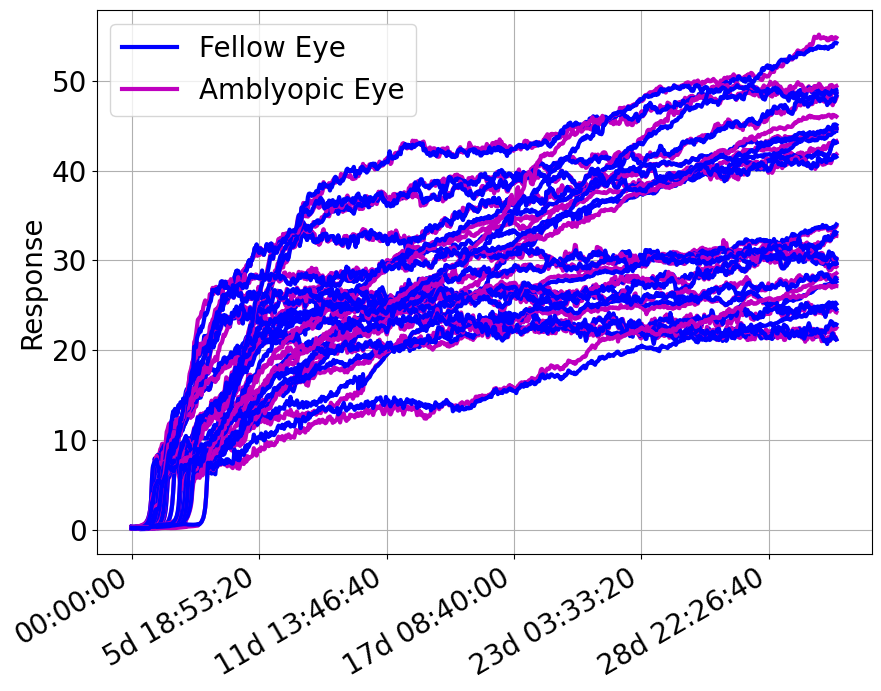

In [ ]:
plot(R.t,R.y[:,0,strong_i],'b',label='Fellow Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Amblyopic Eye')

for n in range(number_of_neurons):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()    

In [ ]:
def plot_weight_image(R,which_neuron=0):
    w_im=R.weight_image(R.W[-1,::])
    buffer=5
    im=hstack([w_im[0,0,::],ones((19,buffer))*w_im[0,::].max(),w_im[0,1,::]])
    imshow(im,cmap='gray')
    gca().set_xticklabels([])
    gca().set_yticklabels([])
    grid(False)

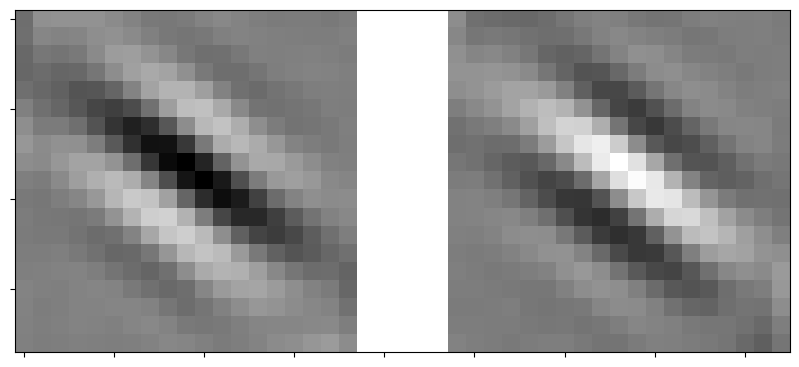

In [ ]:
plot_weight_image(R,0)

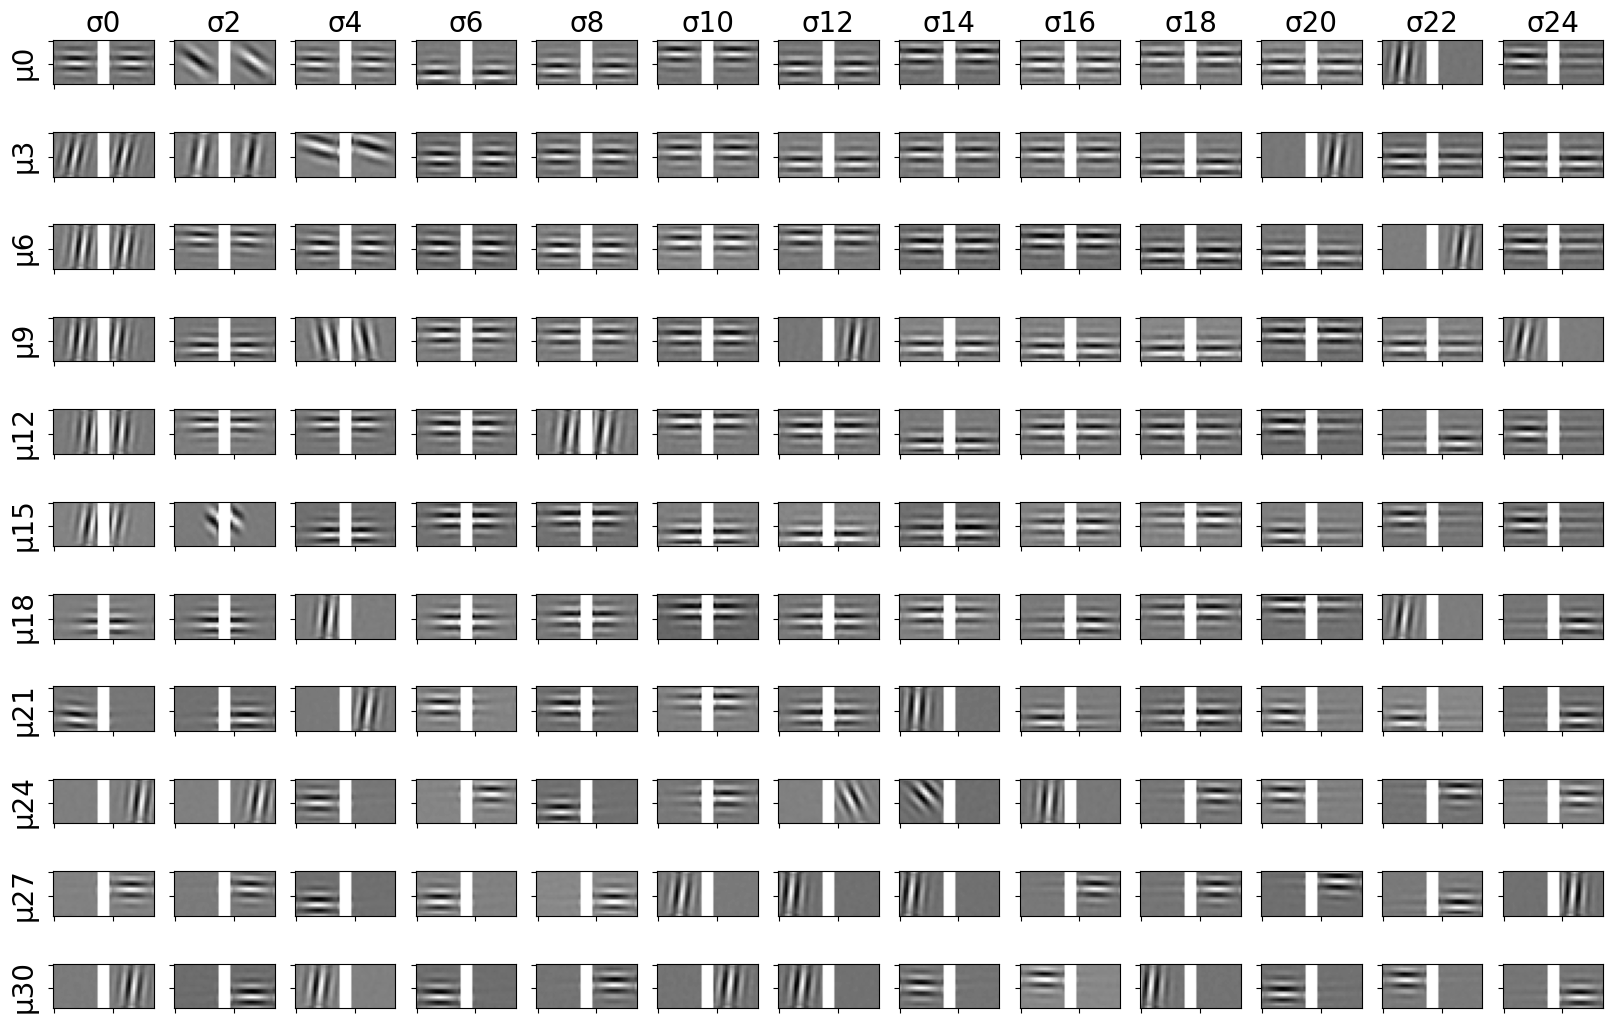

In [ ]:
count=0
figure(figsize=(20,13))
for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        sfname=f'{base}/nr %d neurons dog %d blur %d mu_c %d sigma_c.asdf' % (number_of_neurons,-1,mu_c,sigma_c)
                                
        R=RR[sfname]
        
        subplot(len(mu_c_mat),len(sigma_c_mat),count+1)
        plot_weight_image(R,0)
        
        if mu_count==0:
            title('σ%d' % sigma_c)
            
        if sigma_count==0:
            ylabel('μ%d' % mu_c)
            
        
        count+=1